In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.renderers.enable('notebook')

alt.data_transformers.disable_max_rows()
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [2]:
!ls

Airline Delays, 2014-2018.ipynb airline_delay_causes.csv


In [3]:
df = pd.read_csv("airline_delay_causes.csv")

In [4]:
#Delays/cancellations over time - worst seasons to travel (calendar heatmap)
#Divide by year
#Sankey Diagram for each airport
#Average airline delay at each airport
#Worst performing airports
# list_of_carriers = ['American',"delta"]
# df[df['carrier'].isin(list_of_carriers)]

In [5]:
df.dtypes

year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [6]:
df=df.rename(columns={' month': 'month',
                     ' weather_ct': 'weather_ct',
                     ' arr_delay': 'arr_delay',
                     ' carrier_delay': 'carrier_delay'})

In [7]:
df = df.drop(['carrier'], axis=1)

In [8]:
df.head()

,year,month,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2004,5,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",1296.0,277.0,66.43,4.00,166.35,0.23,39.98,1.0,6.0,13201.0,4795.0,409.0,5761.0,8.0,2228.0
1,2004,5,JetBlue Airways,JFK,"New York, NY: John F. Kennedy International",2684.0,461.0,70.67,1.32,189.79,12.11,187.11,1.0,8.0,20322.0,3605.0,36.0,6773.0,449.0,9459.0
2,2004,5,Continental Air Lines Inc.,JFK,"New York, NY: John F. Kennedy International",31.0,5.0,0.72,1.00,3.28,0.00,0.00,0.0,0.0,278.0,86.0,73.0,119.0,0.0,0.0
3,2004,5,Atlantic Coast Airlines,JFK,"New York, NY: John F. Kennedy International",445.0,96.0,30.73,3.40,24.62,0.00,37.25,8.0,2.0,7433.0,1986.0,471.0,1728.0,0.0,3248.0
4,2004,5,Delta Air Lines Inc.,JFK,"New York, NY: John F. Kennedy International",1175.0,317.0,51.60,1.93,227.31,0.85,35.31,3.0,2.0,13689.0,3113.0,57.0,8289.0,28.0,2202.0


In [9]:
df = df[(df.year==2018) | (df.year==2017) | (df.year==2016) | (df.year==2015) | (df.year==2014)]

In [10]:
df.groupby(by='airport')['weather_delay'].sum()

airport
EWR    373377.0
JFK    292025.0
LGA    474570.0
Name: weather_delay, dtype: float64

In [11]:
df.carrier_name.value_counts()

Delta Air Lines Inc.            180
American Airlines Inc.          180
JetBlue Airways                 180
United Air Lines Inc.           142
Virgin America                  137
ExpressJet Airlines Inc.        131
Southwest Airlines Co.          120
Alaska Airlines Inc.            100
SkyWest Airlines Inc.            92
Envoy Air                        86
Spirit Air Lines                 75
Hawaiian Airlines Inc.           60
Frontier Airlines Inc.           60
US Airways Inc.                  54
Republic Airline                 36
Endeavor Air Inc.                36
PSA Airlines Inc.                22
Mesa Airlines Inc.               12
Allegiant Air                    12
American Eagle Airlines Inc.      9
AirTran Airways Corporation       8
Name: carrier_name, dtype: int64

# Longest Delays in Minutes

In [12]:
delays = df.pivot_table(columns='month', index='carrier_name', values='arr_delay')#.reset_index()

In [13]:
delays = delays.sort_values(7)

In [14]:
delays = delays.dropna()

In [15]:
delays.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
carrier_name,,,,,,,,,,,,
Hawaiian Airlines Inc.,823.0,684.000000,228.2,190.4,160.0,299.4,259.6,229.0,193.4,212.0,161.8,379.6
Allegiant Air,825.0,144.000000,45.0,475.0,693.0,457.0,999.0,543.0,177.0,246.0,148.0,257.0
Frontier Airlines Inc.,1185.0,1192.800000,1296.0,1309.2,1607.8,1779.6,1981.8,1909.6,1197.8,1275.4,1266.4,1885.8
Mesa Airlines Inc.,1742.0,1221.000000,1641.0,2039.0,3217.0,2423.0,2339.0,3205.0,3456.0,2523.0,3274.0,1818.0
PSA Airlines Inc.,1742.0,1902.666667,1658.5,2177.5,1633.5,4562.0,2477.0,3269.0,1660.0,1962.0,2354.5,1530.5


([<matplotlib.axis.XTick at 0x11b74dc18>,
 <a list of 12 Text xticklabel objects>)

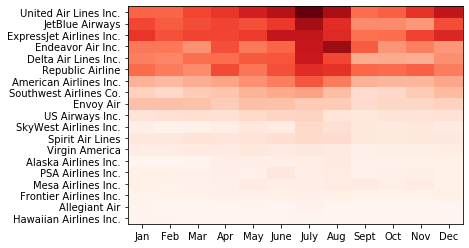

In [16]:
plt.pcolor(delays, cmap='Reds')

tick_labels = delays.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)

# Cancelled Flights

In [17]:
cancelled = df.pivot_table(columns='month', index='carrier_name', values='arr_cancelled')#.reset_index()

In [18]:
cancelled = cancelled.sort_values(7)

In [19]:
cancelled.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
carrier_name,,,,,,,,,,,,
Hawaiian Airlines Inc.,0.200000,0.200000,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Virgin America,9.615385,8.384615,7.769231,0.818182,0.454545,1.0,0.636364,0.636364,0.4,0.818182,1.090909,0.818182
AirTran Airways Corporation,15.000000,24.000000,1.000000,1.000000,2.000000,2.0,1.000000,0.000000,NaN,NaN,NaN,NaN
Frontier Airlines Inc.,4.400000,1.200000,2.600000,0.400000,2.000000,1.0,2.000000,2.800000,0.6,0.800000,0.400000,2.000000
Allegiant Air,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,2.000000,1.0,1.000000,0.000000,1.000000


In [20]:
cancelled = cancelled.dropna()

([<matplotlib.axis.XTick at 0x11bdb9cc0>,
 <a list of 12 Text xticklabel objects>)

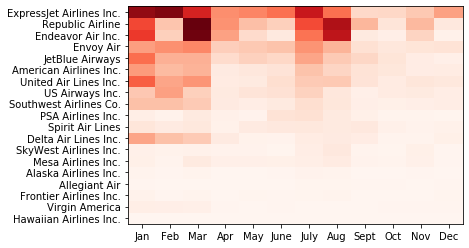

In [21]:
plt.pcolor(cancelled, cmap='Reds')

tick_labels = cancelled.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)

# Weather Delays

In [22]:
weather = df.pivot_table(columns='month', index='carrier_name', values='weather_ct')#.reset_index()

In [23]:
weather = weather.sort_values(7)

In [24]:
weather = weather.dropna()

In [25]:
weather.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
carrier_name,,,,,,,,,,,,
PSA Airlines Inc.,0.256667,0.4400,0.500,0.225,0.0000,2.160,0.000,2.0000,0.000000,0.480000,0.830000,0.275000
Frontier Airlines Inc.,0.000000,0.0000,0.000,0.044,0.4820,0.000,0.044,0.4900,0.172000,0.000000,0.014000,0.312000
Hawaiian Airlines Inc.,1.118000,0.5960,0.000,0.050,0.0000,0.000,0.308,0.0000,0.000000,0.000000,0.000000,0.000000
Alaska Airlines Inc.,0.260000,0.5475,0.125,0.000,0.2325,0.125,0.705,0.3375,0.138889,0.281111,1.025556,0.452222
Allegiant Air,1.000000,0.0000,0.000,0.000,0.0000,0.750,1.000,0.0000,0.000000,0.960000,0.000000,0.290000


([<matplotlib.axis.XTick at 0x11bee1048>,
 <a list of 12 Text xticklabel objects>)

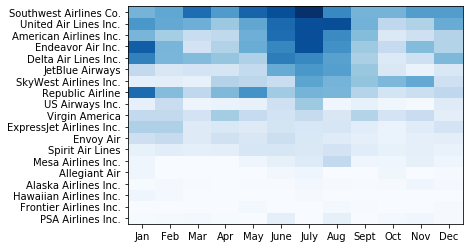

In [26]:
plt.pcolor(weather, cmap='Blues')

tick_labels = weather.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)

# Delayed Fligths

In [27]:
df['delayed_ratio'] = (df['arr_del15'] *100) / (df['arr_flights'])

In [28]:
delayed = df.pivot_table(columns='month', index='carrier_name', values='delayed_ratio')#.reset_index()

In [29]:
delayed = delayed.sort_values(7)

In [30]:
delayed = delayed.dropna()

([<matplotlib.axis.XTick at 0x11b17d748>,
 <a list of 12 Text xticklabel objects>)

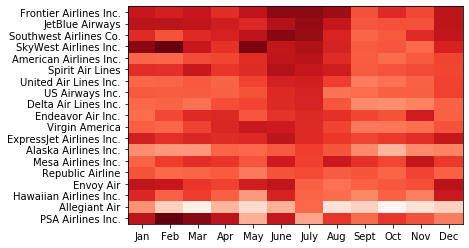

In [31]:
plt.pcolor(delayed, cmap='Reds')

tick_labels = delayed.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)

# Carrier Delays

In [66]:
carrier_delay = df.pivot_table(columns='month', index='carrier_name', values='carrier_ct')#.reset_index()

In [67]:
carrier_delay = carrier_delay.sort_values(7)

In [68]:
carrier_delay = carrier_delay.dropna()

([<matplotlib.axis.XTick at 0x11cec3ba8>,
 <a list of 12 Text xticklabel objects>)

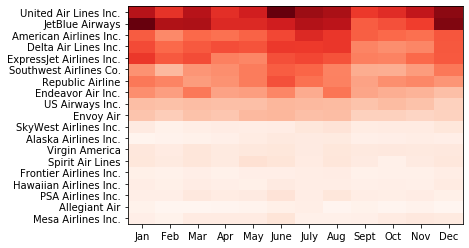

In [69]:
plt.pcolor(carrier_delay, cmap='Reds')

tick_labels = carrier_delay.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)

In [36]:
df.head()

,year,month,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delayed_ratio
1156,2014,1,American Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",1139.0,233.0,68.65,11.21,78.74,...,74.40,74.0,13.0,15754.0,3957.0,1575.0,3431.0,0.0,6791.0,20.456541
1157,2014,1,JetBlue Airways,JFK,"New York, NY: John F. Kennedy International",3342.0,1010.0,289.30,27.47,235.20,...,456.60,438.0,29.0,88507.0,22678.0,4308.0,14623.0,77.0,46821.0,30.221424
1158,2014,1,Delta Air Lines Inc.,JFK,"New York, NY: John F. Kennedy International",1637.0,411.0,117.63,27.13,165.08,...,101.16,96.0,24.0,39000.0,11001.0,7169.0,11161.0,0.0,9669.0,25.106903
1159,2014,1,Hawaiian Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",29.0,3.0,2.00,1.00,0.00,...,0.00,0.0,1.0,202.0,96.0,106.0,0.0,0.0,0.0,10.344828
1160,2014,1,American Eagle Airlines Inc.,JFK,"New York, NY: John F. Kennedy International",650.0,159.0,28.45,8.53,44.75,...,77.26,102.0,3.0,10672.0,2391.0,615.0,2331.0,0.0,5335.0,24.461538


# Cancelled or Diverted Flights, LaGuardia

In [96]:
lga = df[(df.airport == 'LGA')]

In [97]:
lga['cancelled_diverted'] = ((lga['arr_cancelled'] + lga['arr_diverted']))

/Users/elenamlutz/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
cancelledlga = lga.pivot_table(columns='month', index='carrier_name', values='cancelled_diverted')#.reset_index()

In [99]:
cancelled_lga = cancelledlga.sort_values(7)

In [101]:
cancelled_lga = cancelled_lga.dropna()

([<matplotlib.axis.XTick at 0x11d92e358>,
 <a list of 12 Text xticklabel objects>)

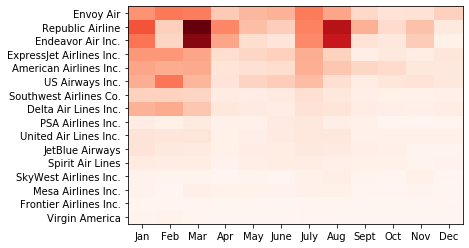

In [102]:
plt.pcolor(cancelled_lga, cmap='Reds')

tick_labels = cancelled_lga.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)

# Weather Delays 2018, LaGuardia

In [103]:
lga['lga_weatherratio'] = (lga['weather_ct'])

/Users/elenamlutz/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
weatherlga = lga.pivot_table(columns='month', index='carrier_name', values='weather_ct')#.reset_index()

In [105]:
weatherlga = weatherlga.sort_values(7)

In [107]:
weatherlga = weatherlga.dropna()

([<matplotlib.axis.XTick at 0x11db58320>,
 <a list of 12 Text xticklabel objects>)

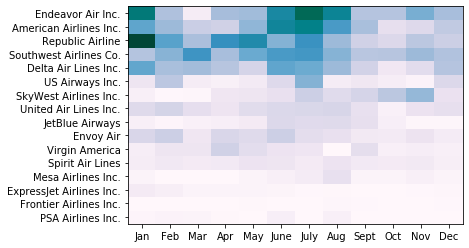

In [108]:
plt.pcolor(weatherlga, cmap='PuBuGn')

tick_labels = weatherlga.index
tick_locations = np.arange(0.5, len(tick_labels), 1)
plt.yticks(tick_locations, tick_labels)

tick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
tick_locations = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
plt.xticks(tick_locations, tick_labels)